In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# 한글 폰트
import matplotlib
from matplotlib import font_manager,rc
import platform 

try: 
    if platform.system()=='Windows':
        font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font',family=font_name)
    else: 
        rc('font',family="AppleGothic")
except:
    pass
matplotlib.rcParams['axes.unicode_minus']=False

%matplotlib inline

In [2]:
hilton=pd.read_csv("./hilton_post",index_col=[0])
holiday=pd.read_csv("./holiday_inn",index_col=[0])
hyatt=pd.read_csv("./hyatt",index_col=[0])
wyndham=pd.read_csv("./wyndham",index_col=[0])

In [5]:
hilton.to_excel("hilton.xlsx")
# hilton.head(15)

In [63]:
hilton['date']=pd.to_datetime(hilton['date'])
# print(hilton['date'].dtype)
holiday['date']=pd.to_datetime(holiday['date'])
hyatt['date']=pd.to_datetime(hyatt['date'])
wyndham['date']=pd.to_datetime(wyndham['date'])

In [8]:
hilton.describe()

,id,view_count,video_duration,likes,comments
count,69.000000,1.0,1.0,69.00000,69.000000
mean,35.000000,1730.0,30.3,3025.15942,8.478261
std,20.062403,NaN,NaN,7476.12859,12.185585
min,1.000000,1730.0,30.3,76.00000,1.000000
25%,18.000000,1730.0,30.3,146.00000,1.000000
50%,35.000000,1730.0,30.3,323.00000,3.000000
75%,52.000000,1730.0,30.3,1488.00000,10.000000
max,69.000000,1730.0,30.3,40295.00000,79.000000


In [69]:
_list=[hilton,hyatt,holiday,wyndham]
for i,lst in enumerate(_list):
    print(i)

0
1
2
3


# hilton likes histogram 

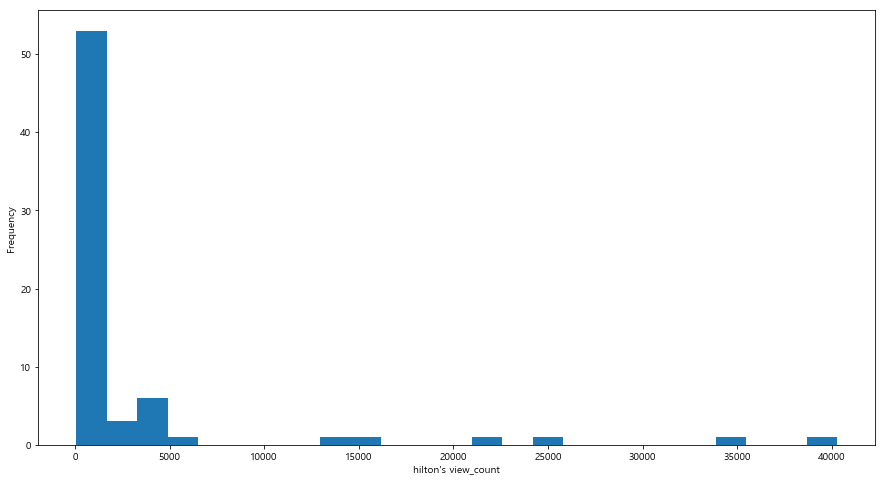

In [82]:
plt.figure(figsize=[15,8])
hilton['likes'].plot.hist(bins=25)
plt.xlabel("hilton's number of likes")
hilton['view_count'].plot.hist(bins=25)
plt.xlabel("hilton's view_count")
plt.show()

# 날짜에 따른 likes 변화

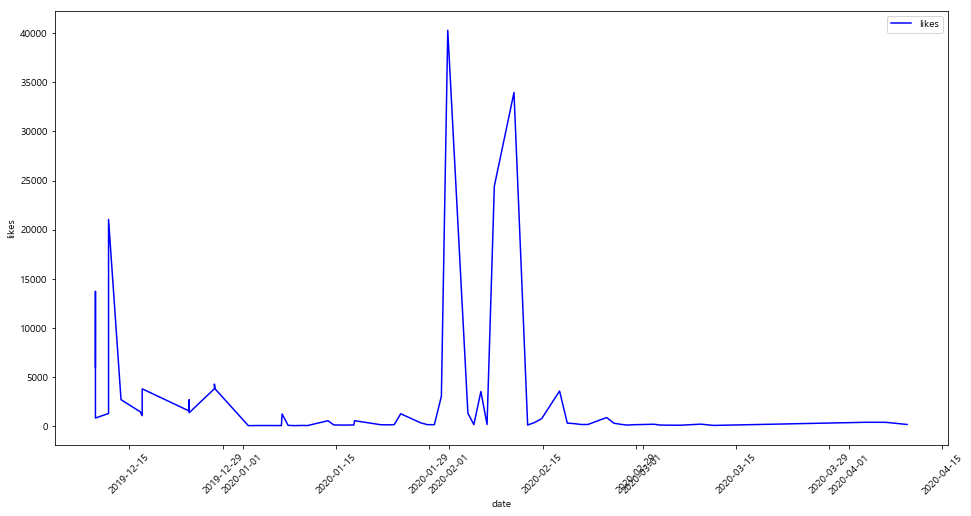

In [83]:

plt.figure(figsize=[16,8])
plt.plot(hilton['date'],hilton['likes'],'b-')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel("date")
plt.ylabel("likes")
plt.show()

# hilton comments histogram

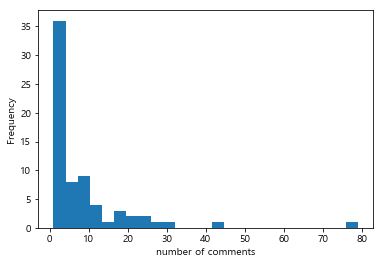

In [28]:
hilton['comments'].plot.hist(bins=25)
plt.xlabel("number of comments")
plt.show()

# 날짜에 따른 comments 변화

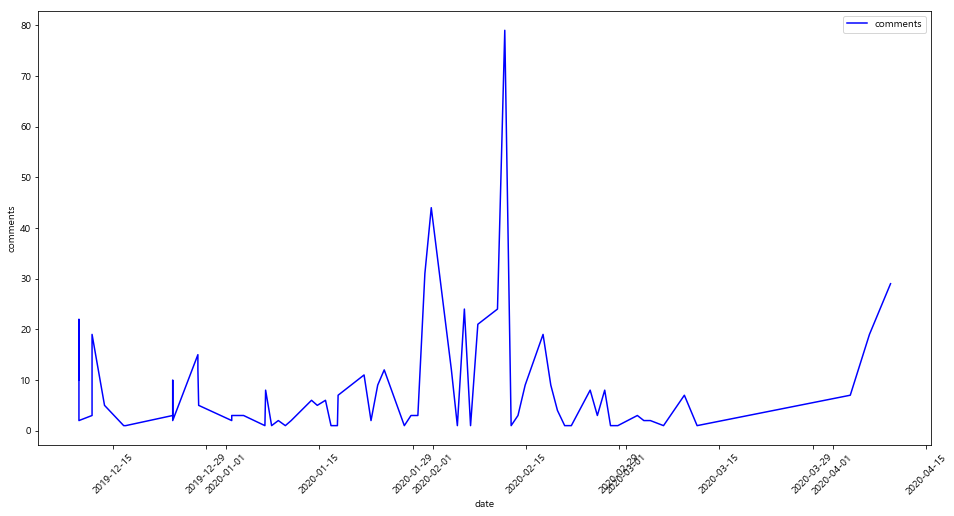

In [37]:
plt.figure(figsize=[16,8])
plt.plot(hilton['date'],hilton['comments'],'b-')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel("date")
plt.ylabel("comments")
plt.show()

# comments 와 likes간의 관계 



In [48]:
likes=hilton[['likes','comments']].sort_values(by="likes")
likes=likes.reset_index().drop(['index'],axis=1)
likes


,likes,comments
0,76,3
1,77,2
2,83,2
3,83,1
4,86,2
5,87,3
6,95,1
7,98,1
8,103,1
9,117,1


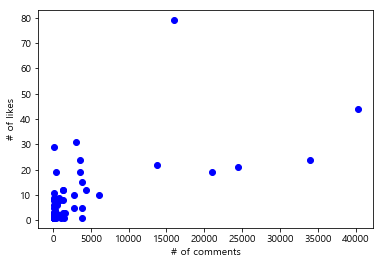

In [53]:
plt.plot(likes['likes'],likes['comments'],"bo")
plt.xlabel("# of comments")
plt.ylabel("# of likes")
plt.show()

In [55]:
print("the correlation coefficient between likes and comments are ",np.round(likes['likes'].corr(likes['comments']),2))

the correlation coefficient between likes and comments are  0.63
